Insurance Claims- Fraud Detection
Automobile Claim Fraud Is Increases Day by Day.so for Industry or Company it is necessary to Predict first wheather this claim is Fraud or Not.it can be predict by Machine Learning.Its Very Diificult To Find Fraud as New Metod they are Finding Fraud.so with the help of Machine Learning company will identify the Fraud Claim and save the Money.

In [6]:
#Importing All Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#importing dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

I am simply loading the file directly from the GitHub repository.

In [8]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [9]:
df.head()  #showing first five rows

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [10]:
df.tail()  #showing last five rows

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [11]:
df.shape #Dimension of dataset

(1000, 40)

There are 1000 rows and 40 columns present in dataset.

In [12]:
pd.set_option('display.max_rows',None)

pd.set_option('display.max_rows',None) - main purpose of using this is it will display all rows (if more than 10 rows) instead of first 5 and last 5.

In [13]:
data_table=[]

for i in df.columns:
    data_table.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(data_table,columns=['features','Unique Number','Unique Values'])

features  Unique Number  \
0            months_as_customer            391   
1                           age             46   
2                 policy_number           1000   
3              policy_bind_date            951   
4                  policy_state              3   
5                    policy_csl              3   
6             policy_deductable              3   
7         policy_annual_premium            991   
8                umbrella_limit             11   
9                   insured_zip            995   
10                  insured_sex              2   
11      insured_education_level              7   
12           insured_occupation             14   
13              insured_hobbies             20   
14         insured_relationship              6   
15                capital-gains            338   
16                 capital-loss            354   
17                incident_date             60   
18                incident_type              4   
19               collision_type              4   
20            incident_severity              4   
21        authorities_contacted              5   
22               incident_state              7   
23                incident_city              7   
24            incident_location           1000   
25     incident_hour_of_the_day             24   
26  number_of_vehicles_involved              4   
27              property_damage              3   
28              bodily_injuries              3   
29                    witnesses              4   
30      police_report_available              3   
31           total_claim_amount            763   
32                 injury_claim            638   
33               property_claim            626   
34                vehicle_claim            726   
35                    auto_make             14   
36                   auto_model             39   
37                    auto_year             21   
38               fraud_reported              2   
39                         _c39              0   

                                        Unique Values  
0   [328, 228, 134, 256, 137, 165, 27, 212, 235, 4...  
1   [48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...  
2   [521585, 342868, 687698, 227811, 367455, 10459...  
3   [17-10-2014, 27-06-2006, 06-09-2000, 25-05-199...  
4                                        [OH, IN, IL]  
5                        [250/500, 100/300, 500/1000]  
6                                   [1000, 2000, 500]  
7   [1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...  
8   [0, 5000000, 6000000, 4000000, 3000000, 800000...  
9   [466132, 468176, 430632, 608117, 610706, 47845...  
10                                     [MALE, FEMALE]  
11  [MD, PhD, Associate, Masters, High School, Col...  
12  [craft-repair, machine-op-inspct, sales, armed...  
13  [sleeping, reading, board-games, bungie-jumpin...  
14  [husband, other-relative, own-child, unmarried...  
15  [53300, 0, 35100, 48900, 66000, 38400, 52800, ...  
16  [0, -62400, -46000, -77000, -39300, -51000, -3...  
17  [25-01-2015, 21-01-2015, 22-02-2015, 10-01-201...  
18  [Single Vehicle Collision, Vehicle Theft, Mult...  
19  [Side Collision, ?, Rear Collision, Front Coll...  
20  [Major Damage, Minor Damage, Total Loss, Trivi...  
21             [Police, None, Fire, Other, Ambulance]  
22                       [SC, VA, NY, OH, WV, NC, PA]  
23  [Columbus, Riverwood, Arlington, Springfield, ...  
24  [9935 4th Drive, 6608 MLK Hwy, 7121 Francis La...  
25  [5, 8, 7, 20, 19, 0, 23, 21, 14, 22, 9, 12, 15...  
26                                       [1, 3, 4, 2]  
27                                       [YES, ?, NO]  
28                                          [1, 0, 2]  
29                                       [2, 0, 3, 1]  
30                                       [YES, ?, NO]  
31  [71610, 5070, 34650, 63400, 6500, 64100, 78650...  
32  [6510, 780, 7700, 6340, 1300, 6410, 21450, 938...  
33  [13020, 780, 3850, 6340, 650, 6410, 7150, 9380...  
34  [52080, 

Some Features Having Unwanted Data like ? ,We will replace in Data Preprocessing part.

In [14]:
df.info()  #information about dataset like data type, Null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [15]:
df.dtypes   #datatype

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

policy_annual_premium, _c39 has float dataset; auto_year ,total_claim_amount, injury_claim, property_claim, vehicle_claim, witnesses, bodily_injuries, number_of_vehicles_involved, incident_hour_of_the_day,capital-loss,capital-gains, insured_zip, umbrella_limit,policy_deductable,months_as_customer, age, policy_number has integer value and rest dataset has object dataset.

In [16]:
df.isnull().sum()  #to check for null value.

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 has null values only in given datsets

<AxesSubplot:>

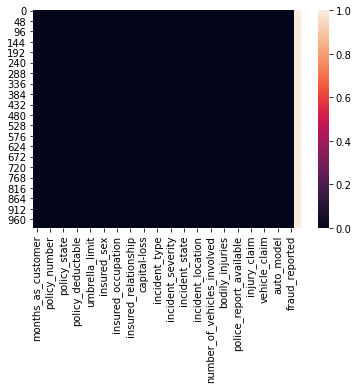

In [17]:
#Let's visualized null values.

sns.heatmap(df.isnull())

Above outcome helps to visualized null values.

In [18]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('length of categorical_features',len(categorical_features))
categorical_features

length of categorical_features 21


['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [19]:
numerical_features=[features for features in df.columns if df[features].dtype!='O']
print('Length of numerical features',len(numerical_features))
numerical_features

Length of numerical features 19


['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 '_c39']

In [20]:
continues_features=[features for features in df[numerical_features] if len(df[features].unique())>25]
print('Length of continues_features',len(continues_features))
continues_features

Length of continues_features 11


['months_as_customer',
 'age',
 'policy_number',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [21]:
discreat_features=[features for features in df[numerical_features] if len(df[features].unique())<25]
print('Length of discreat_features',len(discreat_features))
discreat_features

Length of discreat_features 8


['policy_deductable',
 'umbrella_limit',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'auto_year',
 '_c39']

In [22]:
year_features=[features for features in df[numerical_features] if "date" in features or 'year' in features]
print('Length Of year_features',len(year_features))
year_features

Length Of year_features 1


['auto_year']

Binary Visulization

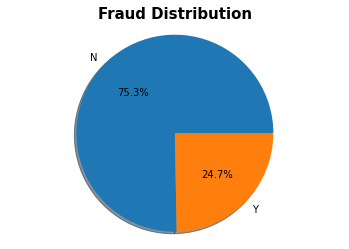

In [23]:
x=(df['fraud_reported']).value_counts()
plt.title('Fraud Distribution',fontdict={'fontweight':'bold','fontsize':15})
plt.pie(x,labels=x.index,shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

24.70% Applicant find as fraud.which is very big and concern to company.

Now We Take Policy Annual Premium is Income for the Company and Total Claim Amount is Expences or Outcome of the company and from that we check weather company is in PROFIT or in LOSS.

In [24]:
df['Profit/Loss']=((df['months_as_customer']/12)*(df['policy_annual_premium']))-(df['total_claim_amount'])
df['Profit/Loss'].values.sum()

-31396110.803333335

Here Amount is in Negative so Company is in Loss.

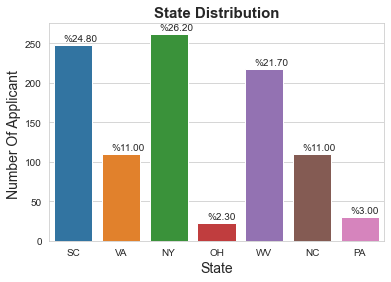

In [25]:
sns.set_style("whitegrid")
ax=sns.countplot(df['incident_state'])
plt.title('State Distribution',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('State',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

Majority of the Applicant from the SC and NY state and OH & PA having very low applicant.

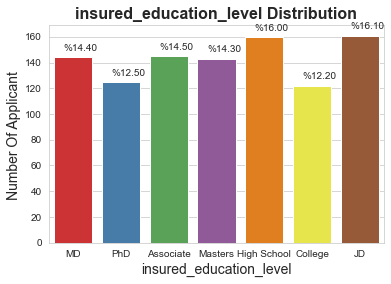

In [26]:
sns.set_style("whitegrid")
ax=sns.countplot(df['insured_education_level'],palette='Set1')
plt.title('insured_education_level Distribution',fontdict={'fontweight':'bold','fontsize':16})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('insured_education_level',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

Text(0, 0.5, 'insured_occupation')

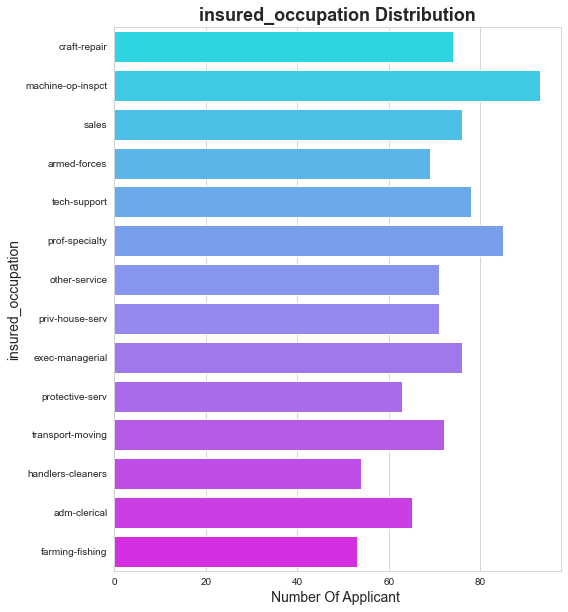

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))
ax=sns.countplot(y=df['insured_occupation'],palette='cool')
plt.title('insured_occupation Distribution',fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel("Number Of Applicant ",fontsize=14)
plt.ylabel('insured_occupation',fontsize=14)

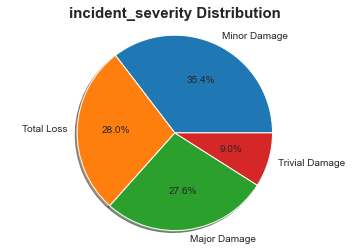

In [28]:
x=(df['incident_severity']).value_counts()
plt.title('incident_severity Distribution',fontdict={'fontweight':'bold','fontsize':15})
plt.pie(x,labels=x.index,shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

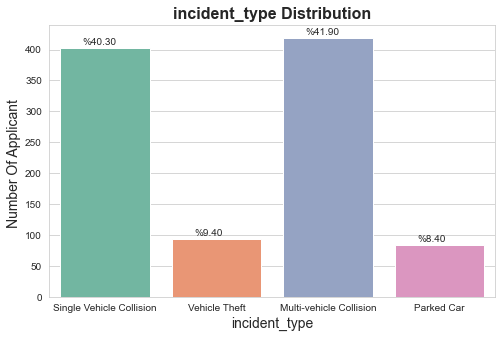

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax=sns.countplot(df['incident_type'],palette='Set2')
plt.title('incident_type Distribution',fontdict={'fontweight':'bold','fontsize':16})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('incident_type',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

from this chart we can see that most of the claim are for vehicle vollision either its single or Multi vehical collision.

for vehical theft and parked card claim is less.

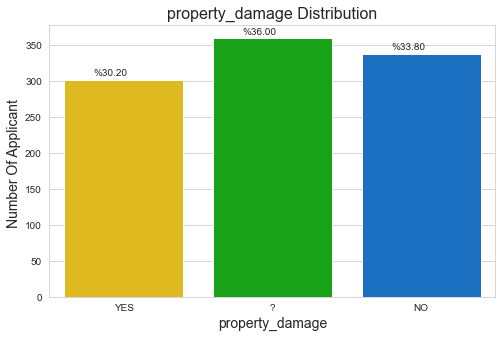

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax=sns.countplot(df['property_damage'],palette='nipy_spectral_r')
plt.title('property_damage Distribution',fontdict={'fontweight':'normal','fontsize':16})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('property_damage',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

here some data are missing or unwanted so we will replace in Data Preprocessing.

Text(0.5, 0, 'auto_make')

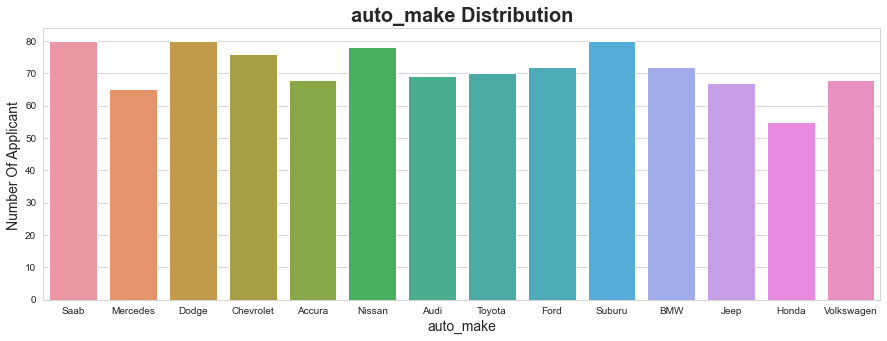

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax=sns.countplot(df['auto_make'])
plt.title('auto_make Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('auto_make',fontsize=14)

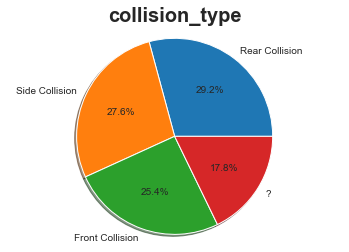

In [32]:
x=df['collision_type'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('collision_type',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

Here also some data are unwanted we will replace it in Data preprocessing part.

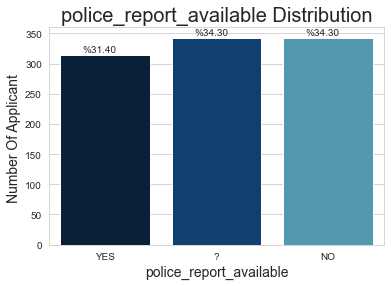

In [33]:
sns.set_style("whitegrid")
ax=sns.countplot(df['police_report_available'],palette='ocean')
plt.title('police_report_available Distribution',fontdict={'fontweight':'normal','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('police_report_available',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

here also some unwanted data is present we will handel it in data preprocessing part.

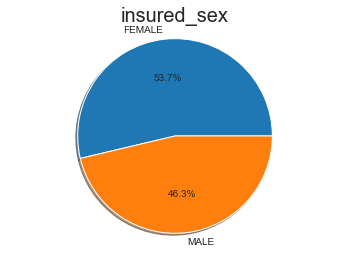

In [34]:
x=df['insured_sex'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('insured_sex',fontdict={'fontweight':'normal','fontsize':20})
plt.axis('equal')
plt.show()

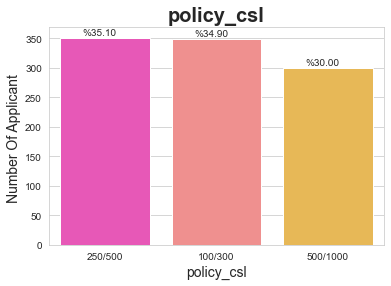

In [35]:
sns.set_style("whitegrid")
ax=sns.countplot(df['policy_csl'],palette='spring')
plt.title('policy_csl',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('policy_csl',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()+5))

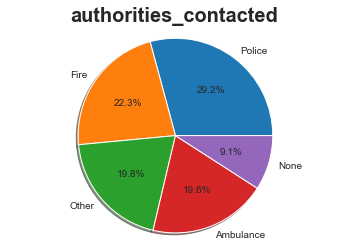

In [36]:
x=df['authorities_contacted'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('authorities_contacted',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

This show that 9.10% did not contact any autority after incident.and majority is contaced to the police

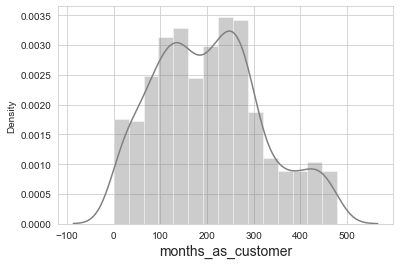

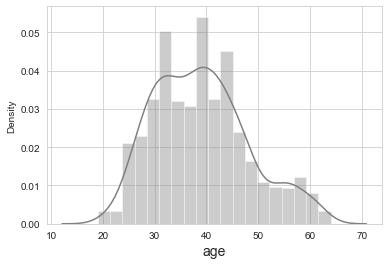

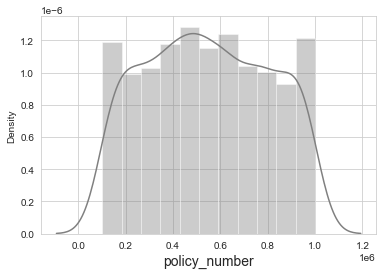

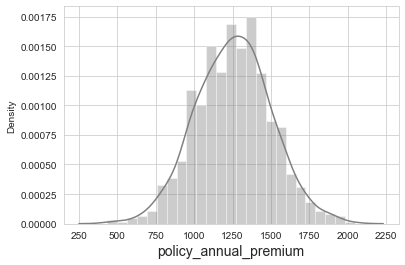

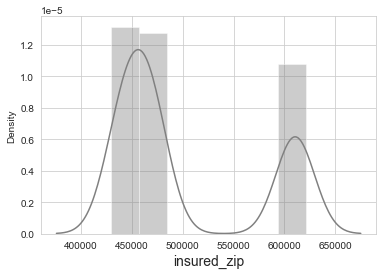

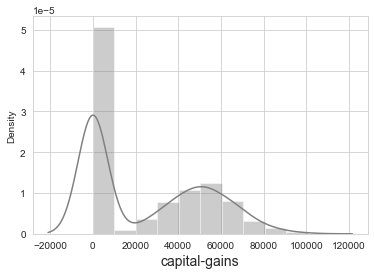

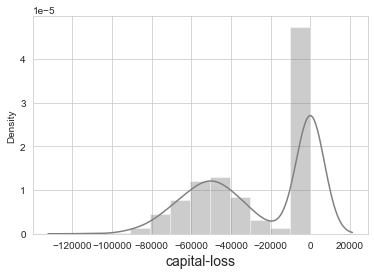

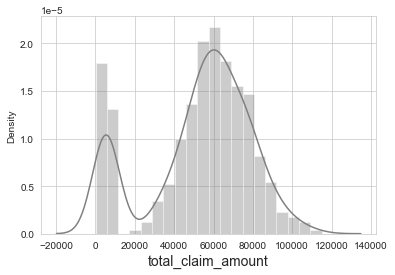

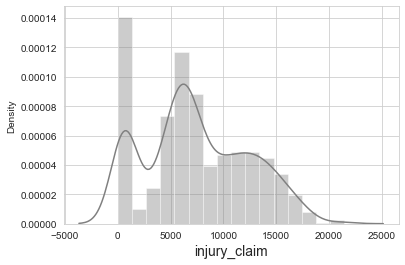

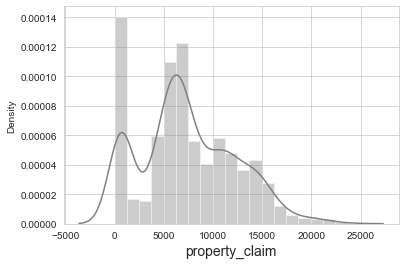

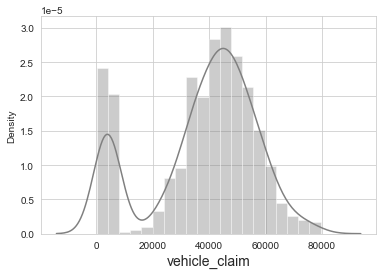

In [37]:
for i in continues_features:
    plt.figure()
    sns.distplot(df[i],color='gray')
    plt.xlabel(i,fontsize=14)

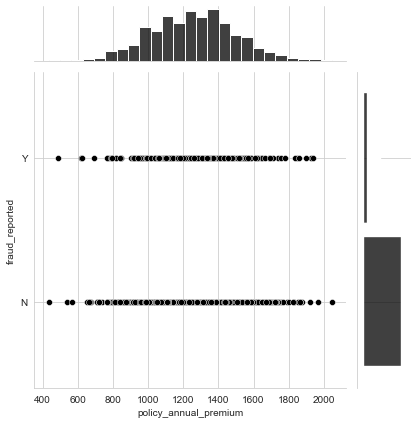

In [38]:
sns.jointplot(x=df['policy_annual_premium'],y=df['fraud_reported'],color='black')

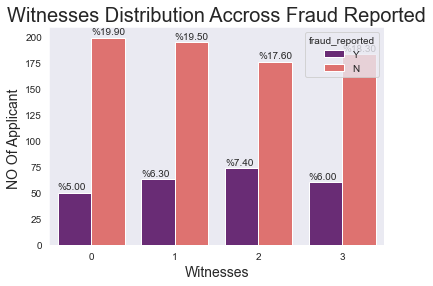

In [39]:
sns.set_style('dark')
ax=sns.countplot(x=df['witnesses'],hue=df['fraud_reported'],palette='magma')
plt.title('Witnesses Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':20})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('Witnesses',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(),p.get_height()+3))

Whose having zero witness having less fraude and having 2 or 3 fraud having more fraud.

Text(0.5, 0, 'Incident_city')

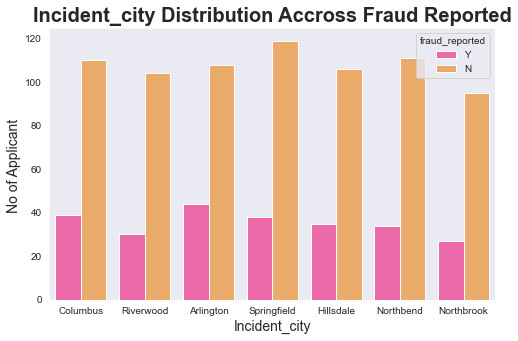

In [40]:
plt.figure(figsize=(8,5))
ax=sns.set_style('dark')
ax=sns.countplot(x=df['incident_city'],hue=df['fraud_reported'],palette='spring')
plt.title('Incident_city Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("No of Applicant ",fontsize=14)
plt.xlabel('Incident_city',fontsize=14)

fraud_reported   N   Y
auto_model            
3 Series        17   1
92x             20   8
93              20   5
95              22   5
A3              27  10
A5              21  11
Accord          10   3
C300            11   7
CRV             17   3
Camry           24   4
Civic           14   8
Corolla         17   3
E400            20   7
Escape          18   6
F150            17  10
Forrestor       20   8
Fusion          15   6
Grand Cherokee  19   6
Highlander      16   6
Impreza         14   6
Jetta           25  10
Legacy          27   5
M5              10   5
MDX             28   8
ML350           12   8
Malibu          27   3
Maxima          17   7
Neon            31   6
Passat          24   9
Pathfinder      27   4
RAM             29  14
RSX             11   1
Silverado       13   9
TL              16   4
Tahoe           15   9
Ultima          20   3
Wrangler        37   5
X5              16   7
X6               9   7


Text(0.5, 0, 'No Of Applicant')

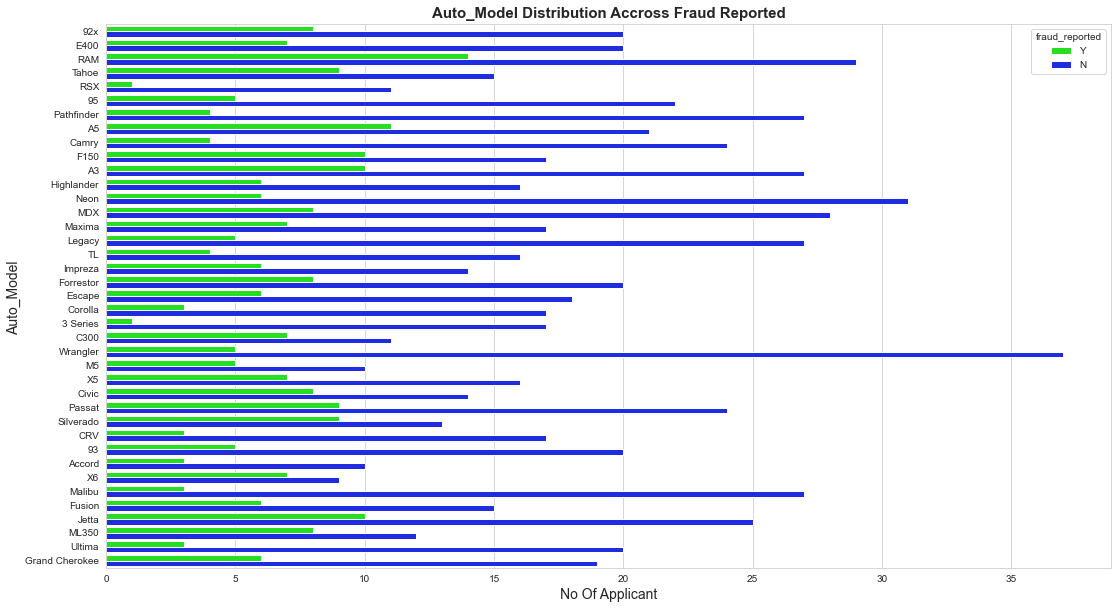

In [41]:
print(pd.crosstab(df['auto_model'],df['fraud_reported']))
plt.figure(figsize=(18,10))
ax=sns.set_style('whitegrid')
ax=sns.countplot(y=df['auto_model'],hue=df['fraud_reported'],palette='hsv')
plt.title('Auto_Model Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("Auto_Model ",fontsize=14)
plt.xlabel('No Of Applicant',fontsize=14)

Most of the Accident show in RAM,Neon,Jeeta.

AM model having more Fraud and RSX having less Fraud claim.

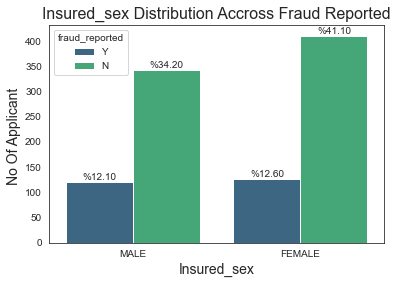

In [42]:
ax=sns.set_style('white')
ax=sns.countplot(x=df['insured_sex'],hue=df['fraud_reported'],palette='viridis')
plt.title('Insured_sex Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':16})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('Insured_sex',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.1, p.get_height()+4))

Fraud Find in Male is more as compair to Female Applicant because Female having more Applicant than Male.

Text(0.5, 0, 'policy_csl')

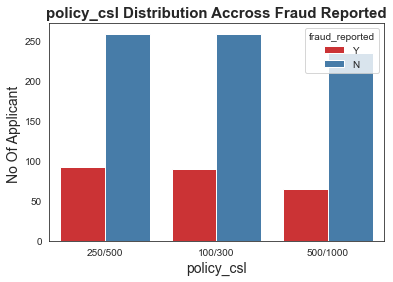

In [43]:
sns.set_style('white')
ax=sns.countplot(x=df['policy_csl'],hue=df['fraud_reported'],palette='Set1')
plt.title('policy_csl Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('policy_csl',fontsize=14)

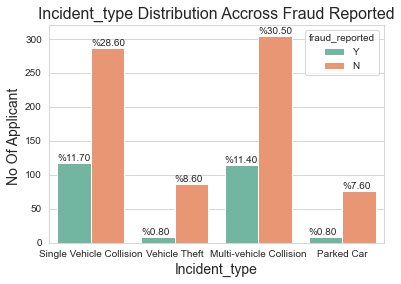

In [44]:
sns.set_style('whitegrid')
ax=sns.countplot(x=df['incident_type'],hue=df['fraud_reported'],palette='Set2')
plt.title('Incident_type Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':16})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('Incident_type',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()+3))

fraud_reported       N   Y
insured_occupation        
adm-clerical        54  11
armed-forces        52  17
craft-repair        52  22
exec-managerial     48  28
farming-fishing     37  16
handlers-cleaners   43  11
machine-op-inspct   71  22
other-service       59  12
priv-house-serv     59  12
prof-specialty      67  18
protective-serv     49  14
sales               55  21
tech-support        56  22
transport-moving    51  21


Text(0.5, 0, 'Insured_education_level')

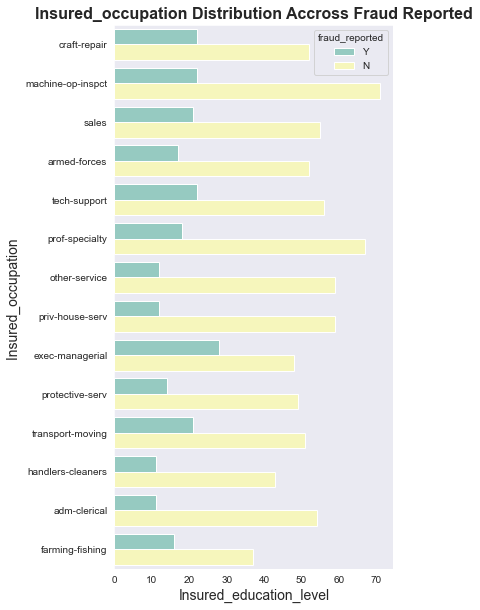

In [45]:
print(pd.crosstab(df['insured_occupation'],df['fraud_reported']))

plt.figure(figsize=(5,10))
sns.set_style('dark')
ax=sns.countplot(y=df['insured_occupation'],hue=df['fraud_reported'],palette='Set3')
plt.title('Insured_occupation Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':16})
plt.ylabel("Insured_occupation ",fontsize=14)
plt.xlabel('Insured_education_level',fontsize=14)

This chart indicated Ex-Managerial having higher Tendency of Fraud and handlers-cleaners having less Tendacyof fraud.This is very shocking Observation.

as highly educated & at higher post becomes fruad and less educated having less fraud.

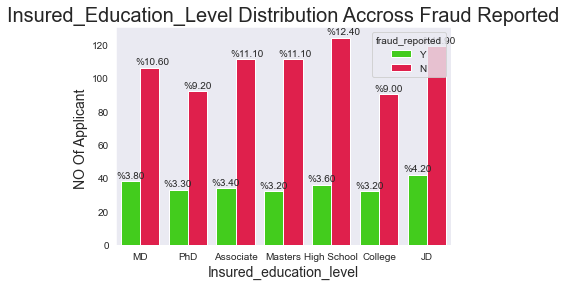

In [46]:
sns.set_style('dark')
ax=sns.countplot(x=df['insured_education_level'],hue=df['fraud_reported'],palette='prism')
plt.title('Insured_Education_Level Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':20})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('Insured_education_level',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()-0.1, p.get_height()+2))

Fraud found in all level of Education

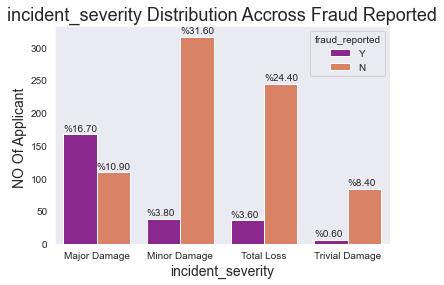

In [47]:
sns.set_style('dark')
ax=sns.countplot(x=df['incident_severity'],hue=df['fraud_reported'],palette='plasma')
plt.title('incident_severity Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':18})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('incident_severity',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()+5))

From This chart we say that Major damage severity having more Fraud so that we should check accros the claim amout too.their may be possible whose claim for higher amount they have fraud too.

Text(0.5, 0, 'fraud_reported')

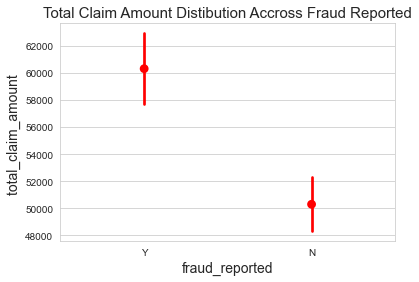

In [48]:
sns.set_style('whitegrid')
sns.pointplot(y=df['total_claim_amount'],x=df['fraud_reported'],join=False,color='red')
plt.title('Total Claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':15})
plt.ylabel("total_claim_amount ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

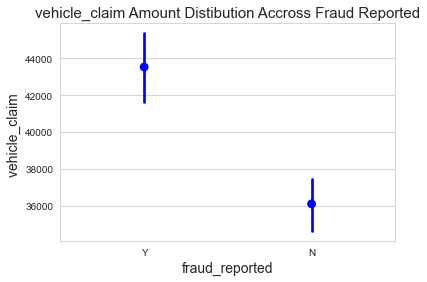

In [49]:
sns.set_style('whitegrid')
sns.pointplot(y=df['vehicle_claim'],x=df['fraud_reported'],join=False,color='blue')
plt.title('vehicle_claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':15})
plt.ylabel("vehicle_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

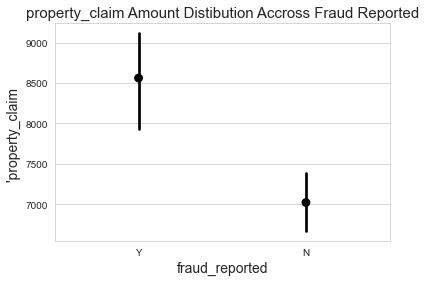

In [50]:
sns.set_style('whitegrid')
sns.pointplot(y=df['property_claim'],x=df['fraud_reported'],join=False,color='black')
plt.title('property_claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':15})
plt.ylabel("'property_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

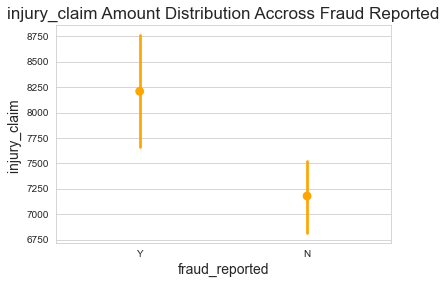

In [51]:
sns.set_style('whitegrid')
sns.pointplot(y=df['injury_claim'],x=df['fraud_reported'],join=False,color='orange')
plt.title('injury_claim Amount Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':17})
plt.ylabel("injury_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

In [52]:
#collision_type
#'police_report_available
#property_damage

In [53]:
df['collision_type']=df['collision_type'].replace('?',np.nan)
df['police_report_available']=df['police_report_available'].replace('?',np.nan)
df['property_damage']=df['property_damage'].replace('?',np.nan)

In [54]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [55]:
nan=['police_report_available','property_damage','collision_type']

In [56]:
for i in nan:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
lb=LabelEncoder()

In [59]:
for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [60]:
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
5                   256   39         104594               385             2   
6                   137   34         413978               112             1   
7                   165   37         429027                60             0   
8                    27   33         485665               132             0   
9                   212   42         636550               772             0   
10                  235   42         543610               795             2   
11                  447   61         214618               891             2   
12                   60   23         842643               634             2   
13                  121   34         626808               806             2   
14                  180   38         644081               875             2   
15                  473   58         892874               601             1   
16                   70   26         558938               251             2   
17                  140   31         275265               470             1   
18                  160   37         921202               879             2   
19                  196   39         143972                44             1   
20                  460   62         183430               769             1   
21                  217   41         431876               834             0   
22                  370   55         285496               816             0   
23                  413   55         115399               237             1   
24                  237   40         736882                33             1   
25                    8   35         699044               163             2   
26                  257   43         863236               629             1   
27                  202   34         608513               559             1   
28                  224   40         914088               236             2   
29                  241   45         596785               106             0   
30                   64   25         908616               544             0   
31                  166   37         666333               591             0   
32                  155   35         336614                20             0   
33                  114   30         584859               107             0   
34                  149   37         990493               391             0   
35                  147   33         129872               256             2   
36                   62   28         200152               268             0   
37                  289   49         933293                61             0   
38                  431   54         485664               781             1   
39                  199   37         982871               823             1   
40                   79   26         206213               246             0   
41                  116   34         616337               931             1   
42                   37   23         448961               920             0   
43                  106   30         790442               397             2   
44                  269   44         108844               161             0   
45                  265   40         430029               663             0   
46                  163   33         529112               233             1   
47                  355   47         939631               547             2   
48                  175   34         866931               199             1   
49                  192   35         582011            

In [61]:
df.describe()

months_as_customer          age  policy_number  policy_bind_date  \
count         1000.000000  1000.000000    1000.000000       1000.000000   
mean           203.954000    38.948000  546238.648000        474.332000   
std            115.113174     9.140287  257063.005276        275.402851   
min              0.000000    19.000000  100804.000000          0.000000   
25%            115.750000    32.000000  335980.250000        233.750000   
50%            199.500000    38.000000  533135.000000        472.500000   
75%            276.250000    44.000000  759099.750000        713.250000   
max            479.000000    64.000000  999435.000000        950.000000   

       policy_state   policy_csl  policy_deductable  policy_annual_premium  \
count    1000.00000  1000.000000        1000.000000            1000.000000   
mean        1.01400     0.951000        1136.000000            1256.406150   
std         0.83096     0.804516         611.864673             244.167395   
min         0.00000     0.000000         500.000000             433.330000   
25%         0.00000     0.000000         500.000000            1089.607500   
50%         1.00000     1.000000        1000.000000            1257.200000   
75%         2.00000     2.000000        2000.000000            1415.695000   
max         2.00000     2.000000        2000.000000            2047.590000   

       umbrella_limit    insured_zip  ...  total_claim_amount  injury_claim  \
count    1.000000e+03    1000.000000  ...          1000.00000   1000.000000   
mean     1.101000e+06  501214.488000  ...         52761.94000   7433.420000   
std      2.297407e+06   71701.610941  ...         26401.53319   4880.951853   
min     -1.000000e+06  430104.000000  ...           100.00000      0.000000   
25%      0.000000e+00  448404.500000  ...         41812.50000   4295.000000   
50%      0.000000e+00  466445.500000  ...         58055.00000   6775.000000   
75%      0.000000e+00  603251.000000  ...         70592.50000  11305.000000   
max      1.000000e+07  620962.000000  ...        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make   auto_model    auto_year  \
count     1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean      7399.570000   37928.950000     6.546000    19.318000  2005.103000   
std       4824.726179   18886.252893     4.034869    11.136107     6.015861   
min          0.000000      70.000000     0.000000     0.000000  1995.000000   
25%       4445.000000   30292.500000     3.000000    10.000000  2000.000000   
50%       6750.000000   42100.000000     7.000000    20.000000  2005.000000   
75%      10885.000000   50822.500000    10.000000    29.000000  2010.000000   
max      23670.000000   79560.000000    13.000000    38.000000  2015.000000   

       fraud_reported  _c39   Profit/Loss  
count     1000.000000   0.0   1000.000000  
mean         0.247000   NaN -31396.110803  
std          0.431483   NaN  28609.096730  
min          0.000000   NaN -98696.934167  
25%          0.000000   NaN -52518.001667  
50%          0.000000   NaN -35353.536250  
75%          0.000000   NaN -14471.937292  
max          1.000000   NaN  48515.443333  

[8 rows x 41 columns]

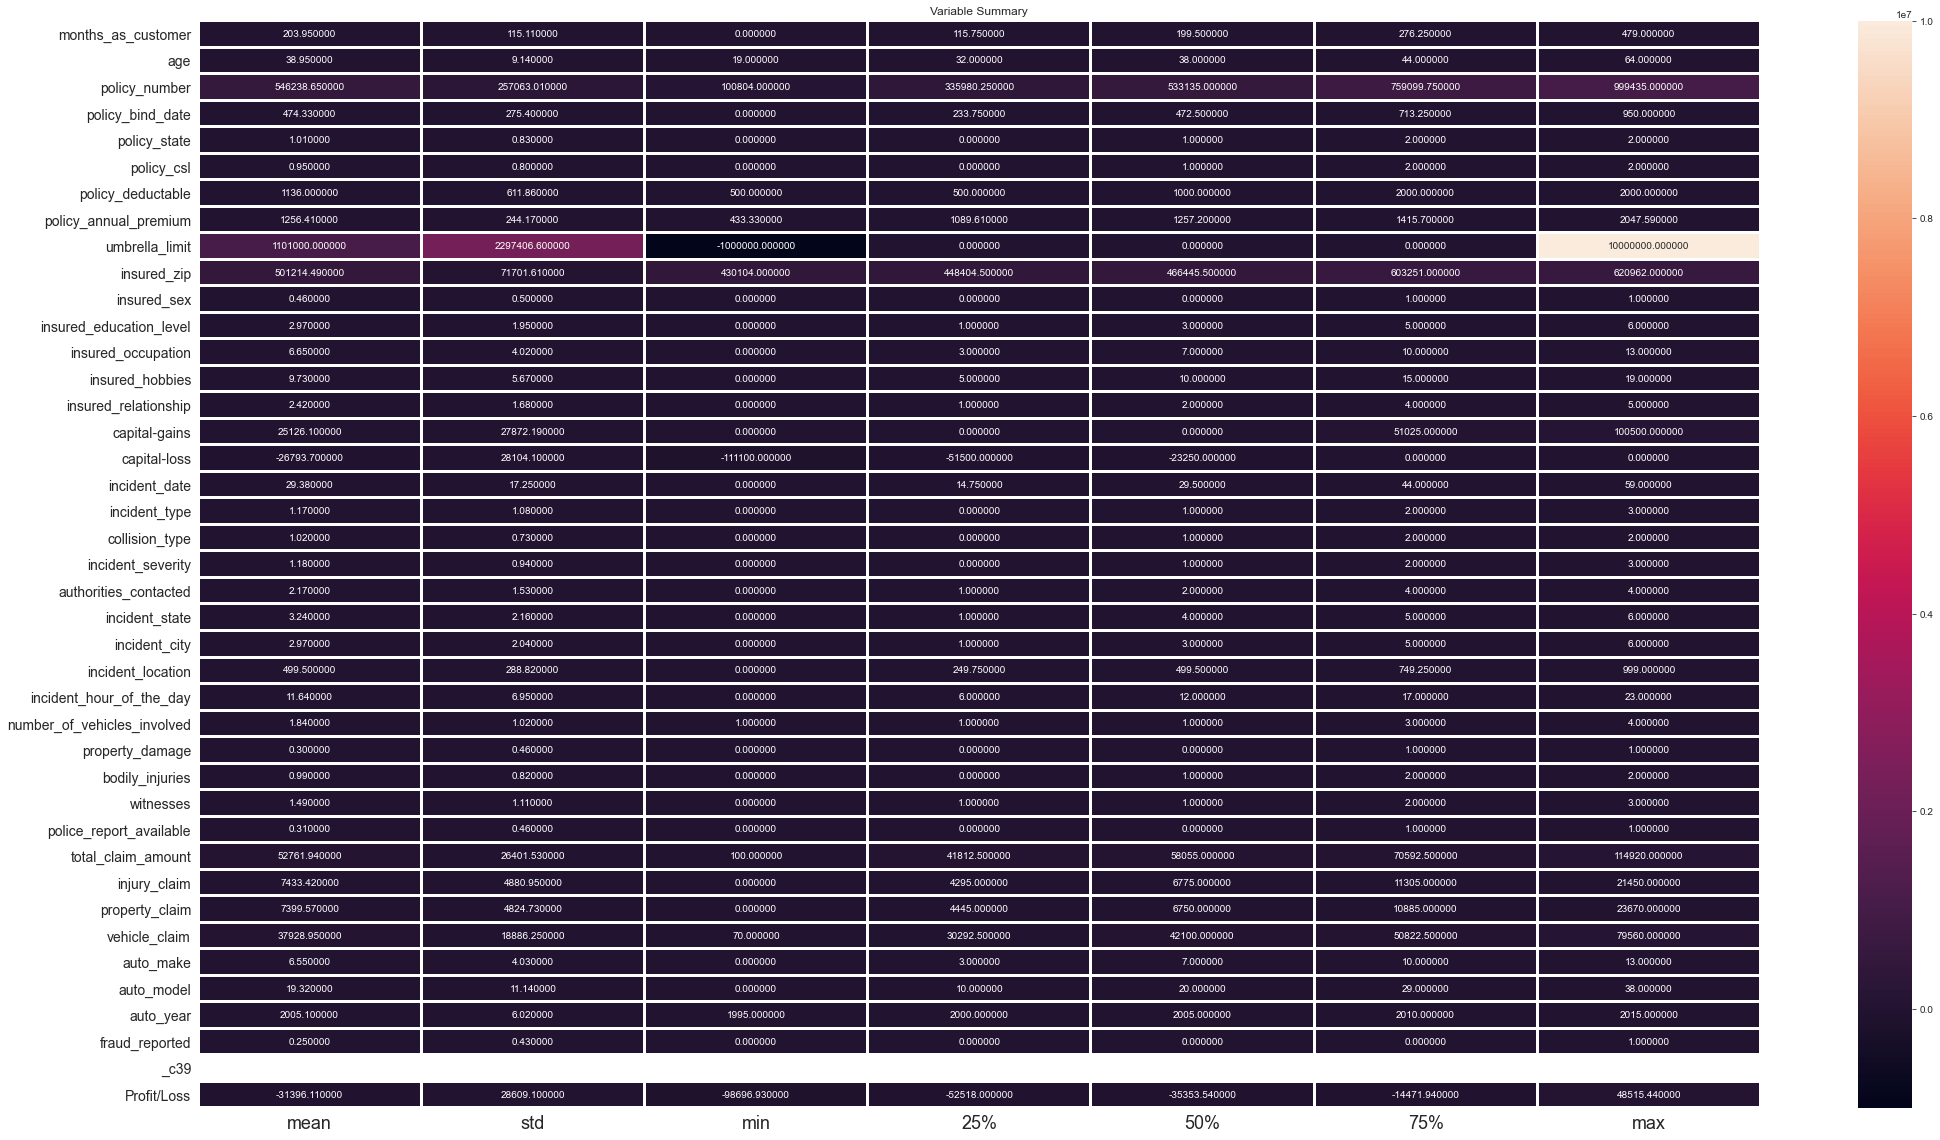

In [62]:
#lets visulized dataset

plt.figure(figsize=(35,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

Co Relation

In [63]:
corr=df.corr()

In [64]:
corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_bind_date                       0.055055  0.056538       0.045713   
policy_state                          -0.000328 -0.014533       0.072815   
policy_csl                            -0.026819 -0.015185       0.038917   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_date                         -0.002985  0.002416       0.053022   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.072787 -0.075642      -0.003338   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
incident_location                     -0.013630 -0.011101       0.016393   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.005488 -0.003408      -0.019923   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available               -0.022146 -0.020441       0.031190   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
auto_year                             -0.000292  0.001354      -0.000183   
fraud_reported                         0.020544  0.012143      -0.029443   
_c39                                        NaN       NaN            NaN   
Profit/Loss                            0.360821  0.321474       0.043803   

                             policy_bind_date  policy_state  policy_csl  \
months_as_customer                   0.055055     -0.000328   -0.026819   
age                                  0.056538     -0.014533   -0.015185   
policy_number                        0.045713      0.072815    0.038917   
policy_bind_date                     1.000000      0.015289    0.008486   
policy_state                         0.015289      1.000000    0.001027   
policy_csl                           0.008486      0.001027    1.000000   
policy_deductable                   -0.001721      0.010033    0.003384   
policy_annual_premium               -0.037733      0.012455    0.023978   
umbrella_limit                      -0.024866     -0.029580    0.021636   
insured_zip                         -0.042749      0.008777    0.006879   
insured_sex

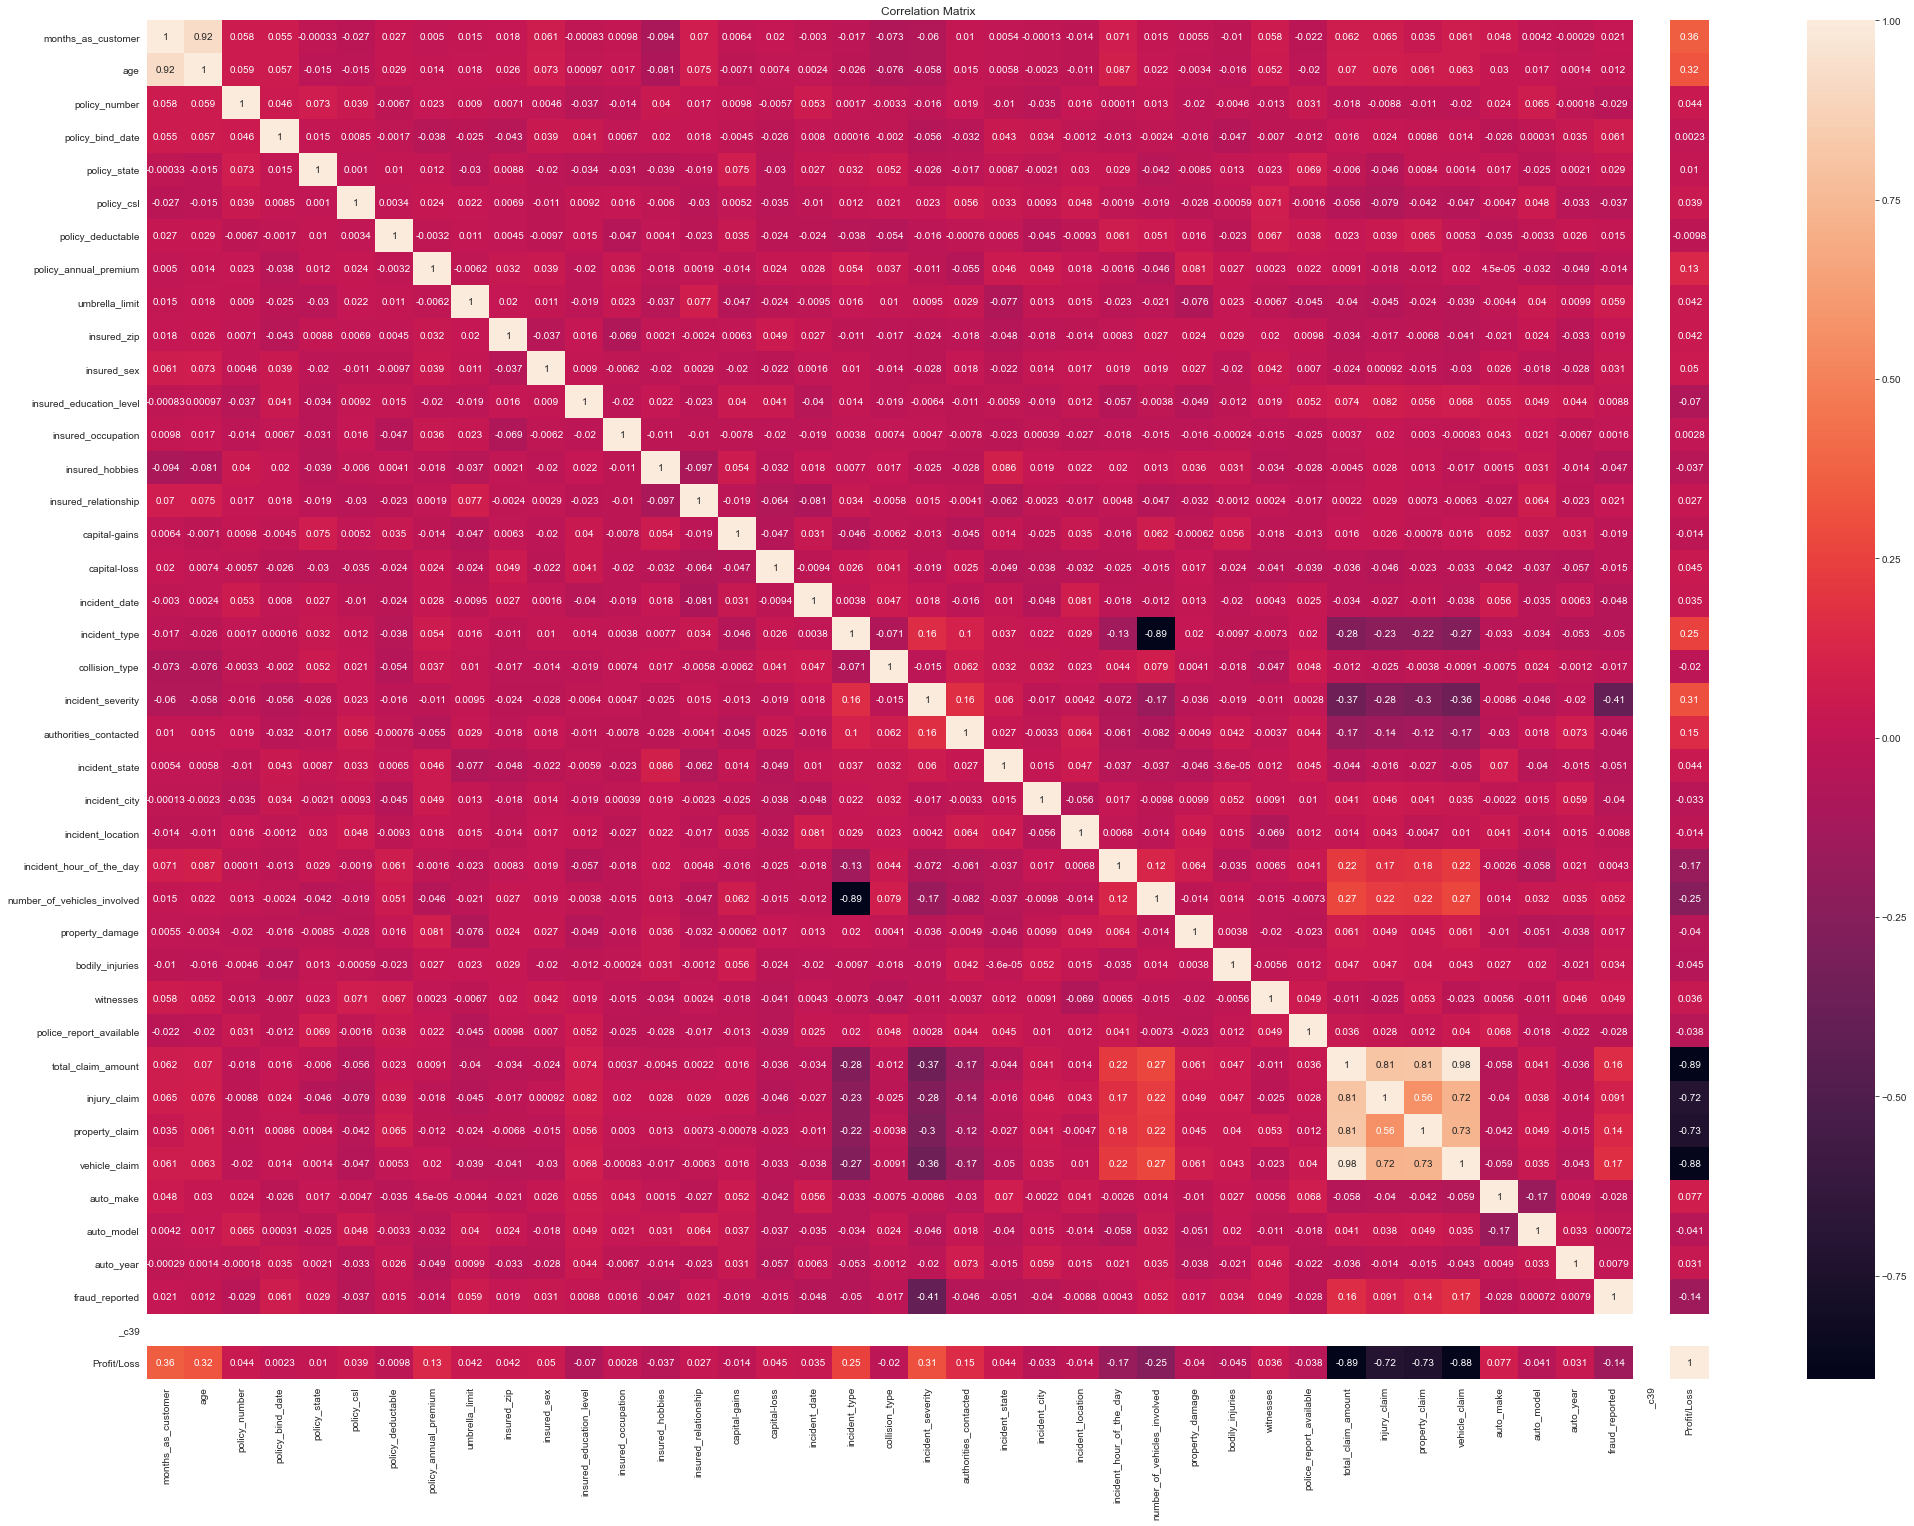

In [65]:
# visulization of correlated values.

plt.figure(figsize=(35,25))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [66]:
df = df.drop(columns=['_c39']) #removing unnecessary columns

In [67]:
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
5                   256   39         104594               385             2   
6                   137   34         413978               112             1   
7                   165   37         429027                60             0   
8                    27   33         485665               132             0   
9                   212   42         636550               772             0   
10                  235   42         543610               795             2   
11                  447   61         214618               891             2   
12                   60   23         842643               634             2   
13                  121   34         626808               806             2   
14                  180   38         644081               875             2   
15                  473   58         892874               601             1   
16                   70   26         558938               251             2   
17                  140   31         275265               470             1   
18                  160   37         921202               879             2   
19                  196   39         143972                44             1   
20                  460   62         183430               769             1   
21                  217   41         431876               834             0   
22                  370   55         285496               816             0   
23                  413   55         115399               237             1   
24                  237   40         736882                33             1   
25                    8   35         699044               163             2   
26                  257   43         863236               629             1   
27                  202   34         608513               559             1   
28                  224   40         914088               236             2   
29                  241   45         596785               106             0   
30                   64   25         908616               544             0   
31                  166   37         666333               591             0   
32                  155   35         336614                20             0   
33                  114   30         584859               107             0   
34                  149   37         990493               391             0   
35                  147   33         129872               256             2   
36                   62   28         200152               268             0   
37                  289   49         933293                61             0   
38                  431   54         485664               781             1   
39                  199   37         982871               823             1   
40                   79   26         206213               246             0   
41                  116   34         616337               931             1   
42                   37   23         448961               920             0   
43                  106   30         790442               397             2   
44                  269   44         108844               161             0   
45                  265   40         430029               663             0   
46                  163   33         529112               233             1   
47                  355   47         939631               547             2   
48                  175   34         866931               199             1   
49                  192   35         582011            

Data Cleaning

In [68]:
df.drop(['Profit/Loss','incident_hour_of_the_day','number_of_vehicles_involved','policy_number','policy_bind_date','incident_date','incident_location','insured_zip'],axis=1)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
5                   256   39             2           1               1000   
6                   137   34             1           1               1000   
7                   165   37             0           0               1000   
8                    27   33             0           0                500   
9                   212   42             0           0                500   
10                  235   42             2           0                500   
11                  447   61             2           0               2000   
12                   60   23             2           2                500   
13                  121   34             2           0               1000   
14                  180   38             2           1               2000   
15                  473   58             1           0               2000   
16                   70   26             2           2               1000   
17                  140   31             1           2                500   
18                  160   37             2           2                500   
19                  196   39             1           2               2000   
20                  460   62             1           1               1000   
21                  217   41             0           2               2000   
22                  370   55             0           0               2000   
23                  413   55             1           0               2000   
24                  237   40             1           0               1000   
25                    8   35             2           0               2000   
26                  257   43             1           0               2000   
27                  202   34             1           0                500   
28                  224   40             2           0               2000   
29                  241   45             0           2               2000   
30                   64   25             0           1               1000   
31                  166   37             0           0               2000   
32                  155   35             0           2               1000   
33                  114   30             0           0               1000   
34                  149   37             0           2                500   
35                  147   33             2           0               1000   
36                   62   28             0           0               1000   
37                  289   49             0           2               2000   
38                  431   54             1           2               2000   
39                  199   37             1           1                500   
40                   79   26             0           0                500   
41                  116   34             1           1                500   
42                   37   23             0           2                500   
43                  106   30             2           1                500   
44                  269   44             0           0               2000   
45                  265   40             0           1               1000   
46                  163   33             1           0                500   
47                  355   47             2           2               2000   
48                  175   34             1           2               1000   
49                  192   35             0           0               1000   
50                  430   59             2           1               2000   
5

In [69]:
df.columns    #Column name

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Profit/Loss'],
      dtype='object')

In [70]:
from scipy.stats import zscore

In [71]:
z=np.abs(zscore(df))

In [72]:
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [73]:
df_new=df[(z<3).all(axis=1)]

In [74]:
df_new.shape   #Checking new shape

(980, 40)

In [75]:
df.shape

(1000, 40)

In [76]:
dataloss=(1000-979)/1000*100    # data loss
dataloss                        

2.1

After removing skewness - total data lost is 2.1%

In [77]:
df=df_new

In [78]:
df[continues_features].skew()   #to check skewness

months_as_customer       0.362608
age                      0.475385
policy_number            0.036283
policy_annual_premium    0.035964
insured_zip              0.837283
capital-gains            0.466619
capital-loss            -0.376884
total_claim_amount      -0.593593
injury_claim             0.271759
property_claim           0.361356
vehicle_claim           -0.620936
dtype: float64

No too much skewness is present in dataset.

In [79]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [80]:
from sklearn.preprocessing import power_transform

In [81]:
# remove skewness
x1=power_transform(x,method='yeo-johnson')
x1=pd.DataFrame(x1)

In [82]:
x1.skew()

0    -0.133972
1    -0.002183
2    -0.161791
3    -0.293677
4    -0.150765
5    -0.096814
6     0.022179
7    -0.007258
8    -7.932397
9     0.000000
10    0.139324
11   -0.187642
12   -0.238129
13   -0.248575
14   -0.160168
15    0.031294
16    0.088750
17   -0.264010
18   -0.095572
19   -0.129037
20   -0.079569
21   -0.223816
22   -0.256064
23   -0.181833
24   -0.288690
25   -0.258027
26    0.372833
27    0.853093
28   -0.133824
29   -0.151669
30    0.796221
31   -0.508540
32   -0.416732
33   -0.357397
34   -0.521805
35   -0.229846
36   -0.276099
37   -0.013973
38    0.384035
dtype: float64

In [83]:
x=x1

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
std=StandardScaler()

In [86]:
X=std.fit_transform(x)

In [87]:
x=X

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [89]:
from sklearn.linear_model import LogisticRegression

Random State Selection

In [90]:
lg=LogisticRegression()

In [91]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 80 score is well
test score 80.10204081632652
train score 80.10204081632652


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

In [93]:
y_train.shape

(784,)

In [94]:
y_train.value_counts()

0    585
1    199
Name: fraud_reported, dtype: int64

SMOTE

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_train,y_train)

In [97]:
trainy.value_counts()

1    585
0    585
Name: fraud_reported, dtype: int64

In [98]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [99]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [100]:
def fun(f):
    f.fit(trainx,trainy)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [101]:
fun(lg)

Accuracy Score 73.46938775510205
Confusion Matrix
 [[110  45]
 [  7  34]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.71      0.81       155
           1       0.43      0.83      0.57        41

    accuracy                           0.73       196
   macro avg       0.69      0.77      0.69       196
weighted avg       0.83      0.73      0.76       196

F1 score 56.666666666666664


In [102]:
fun(svc)

Accuracy Score 76.53061224489795
Confusion Matrix
 [[127  28]
 [ 18  23]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       155
           1       0.45      0.56      0.50        41

    accuracy                           0.77       196
   macro avg       0.66      0.69      0.67       196
weighted avg       0.79      0.77      0.77       196

F1 score 50.0


In [103]:
fun(dtc)

Accuracy Score 75.51020408163265
Confusion Matrix
 [[120  35]
 [ 13  28]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       155
           1       0.44      0.68      0.54        41

    accuracy                           0.76       196
   macro avg       0.67      0.73      0.69       196
weighted avg       0.81      0.76      0.77       196

F1 score 53.84615384615385


In [104]:
fun(knn)

Accuracy Score 46.93877551020408
Confusion Matrix
 [[58 97]
 [ 7 34]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.37      0.53       155
           1       0.26      0.83      0.40        41

    accuracy                           0.47       196
   macro avg       0.58      0.60      0.46       196
weighted avg       0.76      0.47      0.50       196

F1 score 39.534883720930225


In [105]:
fun(gb)

Accuracy Score 58.673469387755105
Confusion Matrix
 [[82 73]
 [ 8 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.53      0.67       155
           1       0.31      0.80      0.45        41

    accuracy                           0.59       196
   macro avg       0.61      0.67      0.56       196
weighted avg       0.79      0.59      0.62       196

F1 score 44.897959183673464


Ensemble Method

In [106]:
#!pip install xgboost

In [107]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRFClassifier

In [108]:
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xgb=XGBClassifier()
sgd=SGDClassifier()
xgbr=XGBRFClassifier()

In [109]:
fun(rfc)

Accuracy Score 82.14285714285714
Confusion Matrix
 [[133  22]
 [ 13  28]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       155
           1       0.56      0.68      0.62        41

    accuracy                           0.82       196
   macro avg       0.74      0.77      0.75       196
weighted avg       0.84      0.82      0.83       196

F1 score 61.53846153846154


In [110]:
fun(ad)

Accuracy Score 77.55102040816327
Confusion Matrix
 [[130  25]
 [ 19  22]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       155
           1       0.47      0.54      0.50        41

    accuracy                           0.78       196
   macro avg       0.67      0.69      0.68       196
weighted avg       0.79      0.78      0.78       196

F1 score 50.0


In [111]:
fun(gd)

Accuracy Score 84.6938775510204
Confusion Matrix
 [[132  23]
 [  7  34]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       155
           1       0.60      0.83      0.69        41

    accuracy                           0.85       196
   macro avg       0.77      0.84      0.80       196
weighted avg       0.88      0.85      0.86       196

F1 score 69.38775510204081


In [112]:
fun(xgb)

[18:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 85.71428571428571
Confusion Matrix
 [[135  20]
 [  8  33]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       155
           1       0.62      0.80      0.70        41

    accuracy                           0.86       196
   macro avg       0.78      0.84      0.80       196
weighted avg       0.88      0.86      0.86       196

F1 score 70.2127659574468


In [113]:
fun(sgd)

Accuracy Score 70.91836734693877
Confusion Matrix
 [[107  48]
 [  9  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       155
           1       0.40      0.78      0.53        41

    accuracy                           0.71       196
   macro avg       0.66      0.74      0.66       196
weighted avg       0.81      0.71      0.74       196

F1 score 52.892561983471076


In [114]:
fun(xgbr)

[18:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 84.6938775510204
Confusion Matrix
 [[131  24]
 [  6  35]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       155
           1       0.59      0.85      0.70        41

    accuracy                           0.85       196
   macro avg       0.77      0.85      0.80       196
weighted avg       0.88      0.85      0.86       196

F1 score 69.99999999999999


Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

In [125]:
for i in range(2,16):
    score=cross_val_score(mod,trainx,trainy,cv=i)
    print("score at cv=",i,score.mean()*100)

score at cv= 2 84.87179487179488
score at cv= 3 84.7008547008547
score at cv= 4 86.41942119781196
score at cv= 5 86.66666666666666
score at cv= 6 86.49572649572652
score at cv= 7 86.93276711882359
score at cv= 8 87.19480943062156
score at cv= 9 86.83760683760684
score at cv= 10 86.83760683760683
score at cv= 11 86.6129109825107
score at cv= 12 87.29135984290623
score at cv= 13 87.52136752136752
score at cv= 14 87.71617080567165
score at cv= 15 87.94871794871796


In [118]:
for i in range(2,16):
    score=cross_val_score(gd,trainx,trainy,cv=i)
    print("score at cv=",i,score.mean()*100)

score at cv= 2 81.28205128205128
score at cv= 3 79.48717948717949
score at cv= 4 84.79679975688438
score at cv= 5 86.49572649572649
score at cv= 6 85.38461538461539
score at cv= 7 86.76015316306163
score at cv= 8 86.85176125244618
score at cv= 9 87.17948717948718
score at cv= 10 87.26495726495727
score at cv= 11 86.86218560138504
score at cv= 12 87.11515534048672
score at cv= 13 87.69230769230771
score at cv= 14 87.7120727809196
score at cv= 15 87.77777777777779


 Hyper parameter tuning

In [119]:
from sklearn.model_selection import GridSearchCV    #Importing requried lib.

In [120]:
parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [121]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=2)

In [122]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [123]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [124]:
mod = RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=8, n_estimators=700)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

79.59183673469387


AUC ROC CURVE

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [129]:
# Lets find ROC AUC Score

roc_auc_score(y_test,lg.predict(x_test))   #LogisticRegression

0.7694728560188827

In [130]:
roc_auc_score(y_test,rfc.predict(x_test))   #RandonForest

0.7704956726986625

In [131]:
roc_auc_score(y_test,dtc.predict(x_test))   #DecisionTree

0.7285601888276948

In [132]:
roc_auc_score(y_test,knn.predict(x_test))   #KNeighbors

0.6017309205350116

In [133]:
roc_auc_score(y_test,mod.predict(x_test))   #mod

0.6018882769472856

In [134]:
roc_auc_score(y_test,ad.predict(x_test))   #KNeighbors

0.6876475216365068

In [135]:
roc_auc_score(y_test,gd.predict(x_test))   #KNeighbors

0.8404405979543665

In [136]:
roc_auc_score(y_test,svc.predict(x_test))   #Support Vector Machine

0.6901652242328875

In [137]:
roc_auc_score(y_test,xgb.predict(x_test))   #xgb

0.8379228953579858

In [139]:
roc_auc_score(y_test,sgd.predict(x_test))   #xgb

0.735405192761605

In [140]:
roc_auc_score(y_test,xgbr.predict(x_test))   #xgb

0.8494099134539732

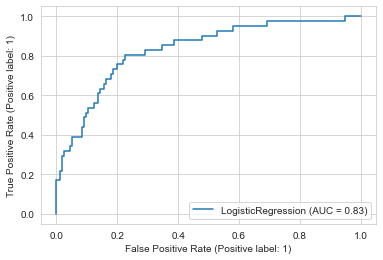

In [141]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(lg,x_test,y_test)

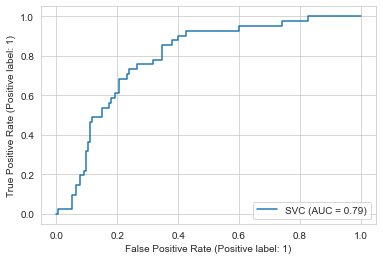

In [142]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(svc,x_test,y_test)

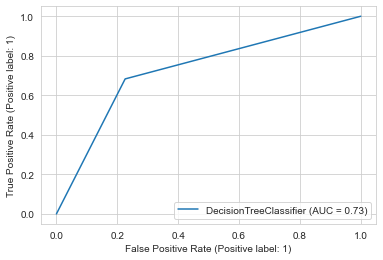

In [143]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(dtc,x_test,y_test)

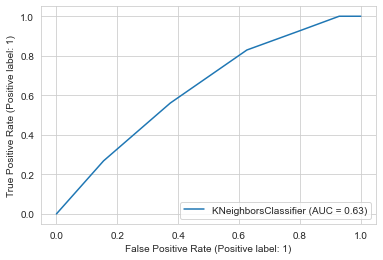

In [144]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(knn,x_test,y_test)

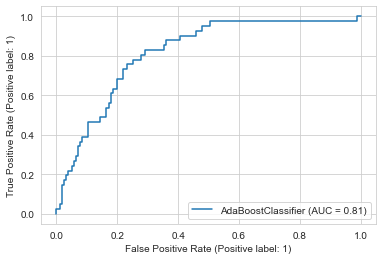

In [145]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(ad,x_test,y_test)

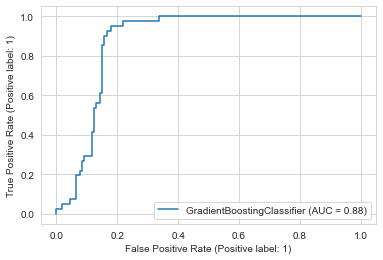

In [146]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(gd,x_test,y_test)

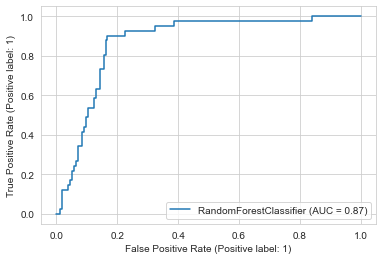

In [147]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(mod,x_test,y_test)

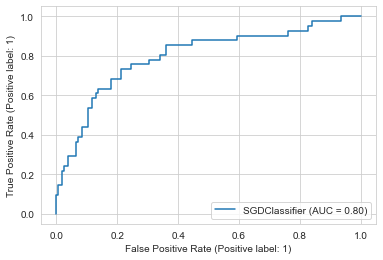

In [148]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(sgd,x_test,y_test)

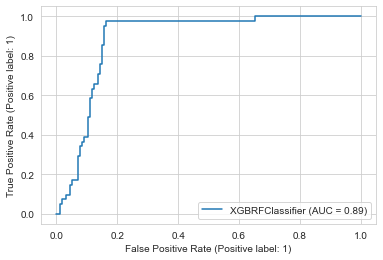

In [149]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(xgbr,x_test,y_test)

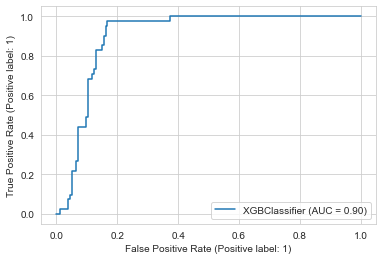

In [151]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(xgb,x_test,y_test)

Saving Model

In [152]:
import pickle
filename='Frau_Detection_Prediction.pkl'
pickle.dump(gd,open(filename,'wb'))

Conclusion

In [154]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=gd.predict(x_test)

print(res)


     Actual  Predict
292       1        1
418       0        0
655       0        1
265       0        0
697       0        1
247       1        1
973       1        1
859       0        0
424       1        1
671       0        0
566       0        0
713       1        1
515       0        0
688       0        0
990       0        0
149       1        0
230       0        0
414       0        0
876       0        0
223       0        0
520       0        0
298       0        0
507       0        0
679       0        0
453       0        0
742       1        1
998       0        1
371       0        0
442       1        0
955       0        0
683       1        1
886       0        0
123       0        0
549       0        0
182       0        0
455       0        0
573       1        1
370       0        1
443       0        0
396       0        1
938       1        0
303       0        0
274       0        0
209       0        0
869       1        1
89        1        1
588       0  